# Ejercisios Practicos IA

Imports Ej 6 práctico 1

In [1]:
import random
import math
from deap import base, creator, tools, algorithms

Ejercicio 6 Práctica 1

In [2]:
CANT_CIUDADES = 20
random.seed(42)

# Generamos coordenadas aleatorias para las ciudades
CIUDADES = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(CANT_CIUDADES)]

# Matriz de distancias
MATRIZ_DISTANCIAS = {}
for i in range(CANT_CIUDADES):
    MATRIZ_DISTANCIAS[i] = {}
    for j in range(CANT_CIUDADES):
        MATRIZ_DISTANCIAS[i][j] = math.dist(CIUDADES[i], CIUDADES[j])

# Matriz de tiempos
MATRIZ_TIEMPOS = {}
for i in range(CANT_CIUDADES):
    MATRIZ_TIEMPOS[i] = {}
    for j in range(CANT_CIUDADES):
        if i == j:
            MATRIZ_TIEMPOS[i][j] = 0
        else:
            trafico = random.uniform(0.8, 2.5)
            MATRIZ_TIEMPOS[i][j] = MATRIZ_DISTANCIAS[i][j] * trafico


# Como el problema tiene distancia y tiempo como objectivos
# le damos dos pesos negativos (minimización en ambos).
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individuo", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# Un individuo es una permutación de todas las ciudades
toolbox.register("indices_ciudades", random.sample, range(CANT_CIUDADES), CANT_CIUDADES)
toolbox.register("individuo", tools.initIterate, creator.Individuo, toolbox.indices_ciudades)
toolbox.register("poblacion", tools.initRepeat, list, toolbox.individuo)


def evaluar_ruta_multi(individuo):
    dist_total = 0
    tiempo_total = 0

    ciudad_actual = individuo[0]
    for siguiente in individuo[1:]:
        dist_total += MATRIZ_DISTANCIAS[ciudad_actual][siguiente]
        tiempo_total += MATRIZ_TIEMPOS[ciudad_actual][siguiente]
        ciudad_actual = siguiente

    # Cerramos el ciclo volviendo a la primera ciudad
    dist_total += MATRIZ_DISTANCIAS[ciudad_actual][individuo[0]]
    tiempo_total += MATRIZ_TIEMPOS[ciudad_actual][individuo[0]]

    return dist_total, tiempo_total


toolbox.register("evaluate", evaluar_ruta_multi)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selNSGA2)  # selección multiobjetivo (NSGA-II)


def ejecutar_moga_tsp():
    print("\n Problema del Agente Viajero con MOGA\n ")

    TAM_POBLACION = 300
    PROB_CRUCE = 0.7
    PROB_MUTACION = 0.2
    MAX_GENERACIONES = 250

    poblacion = toolbox.poblacion(n=TAM_POBLACION)
    frente_pareto = tools.ParetoFront()

    # Estadísticas separadas para distancia y tiempo
    stats_dist = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats_dist.register("avg", lambda x: sum(x) / len(x))
    stats_dist.register("min", min)

    stats_tiempo = tools.Statistics(lambda ind: ind.fitness.values[1])
    stats_tiempo.register("avg", lambda x: sum(x) / len(x))
    stats_tiempo.register("min", min)

    stats = tools.MultiStatistics(distancia=stats_dist, tiempo=stats_tiempo)

    poblacion, log = algorithms.eaMuPlusLambda(
        poblacion, toolbox,
        mu=TAM_POBLACION, lambda_=TAM_POBLACION,
        cxpb=PROB_CRUCE, mutpb=PROB_MUTACION,
        ngen=MAX_GENERACIONES,
        stats=stats, halloffame=frente_pareto, verbose=True
    )

    print("\n--- Evolución completada ---")
    print(f"Se encontraron {len(frente_pareto)} soluciones no dominadas (frente de Pareto):")
    print("(Distancia, Tiempo)")

    for ind in frente_pareto:
        d, t = ind.fitness.values
        print(f"  {d:.2f}, {t:.2f}")

    print("\nPrimera solución del frente (la más corta en distancia):")
    d, t = frente_pareto[0].fitness.values
    print(f"  Ruta: {frente_pareto[0]}")
    print(f"  Distancia total: {d:.2f}")
    print(f"  Tiempo total: {t:.2f}")


# Ejecutamos la función para que corra en el notebook
ejecutar_moga_tsp()


 Problema del Agente Viajero con MOGA
 
   	      	          distancia           	            tiempo            
   	      	------------------------------	------------------------------
gen	nevals	avg    	gen	min    	nevals	avg    	gen	min    	nevals
0  	300   	1153.77	0  	872.573	300   	1912.17	0  	1351.95	300   
1  	280   	1085.28	1  	872.573	280   	1762.78	1  	1327.6 	280   
2  	262   	1048.54	2  	872.573	262   	1684.35	2  	1321.23	262   
3  	277   	1020.76	3  	836.122	277   	1609.36	3  	1282.41	277   
4  	270   	985.93 	4  	810.264	270   	1545.48	4  	1245.82	270   
5  	267   	963.644	5  	810.264	267   	1509.46	5  	1245.82	267   
6  	265   	943.952	6  	800.07 	265   	1472.93	6  	1245.82	265   
7  	265   	930.27 	7  	792.916	265   	1445.71	7  	1220.04	265   
8  	274   	916.292	8  	740.079	274   	1415.74	8  	1155.48	274   
9  	275   	898.44 	9  	740.079	275   	1393.82	9  	1096.99	275   
10 	267   	888.411	10 	719.43 	267   	1370.5 	10 	1078.74	267   
11 	270   	881.573	11 	719.43 	27

Imports Ej 4 práctico 2

In [3]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Ejercicio 4 práctica 2, auto-mpg dataset

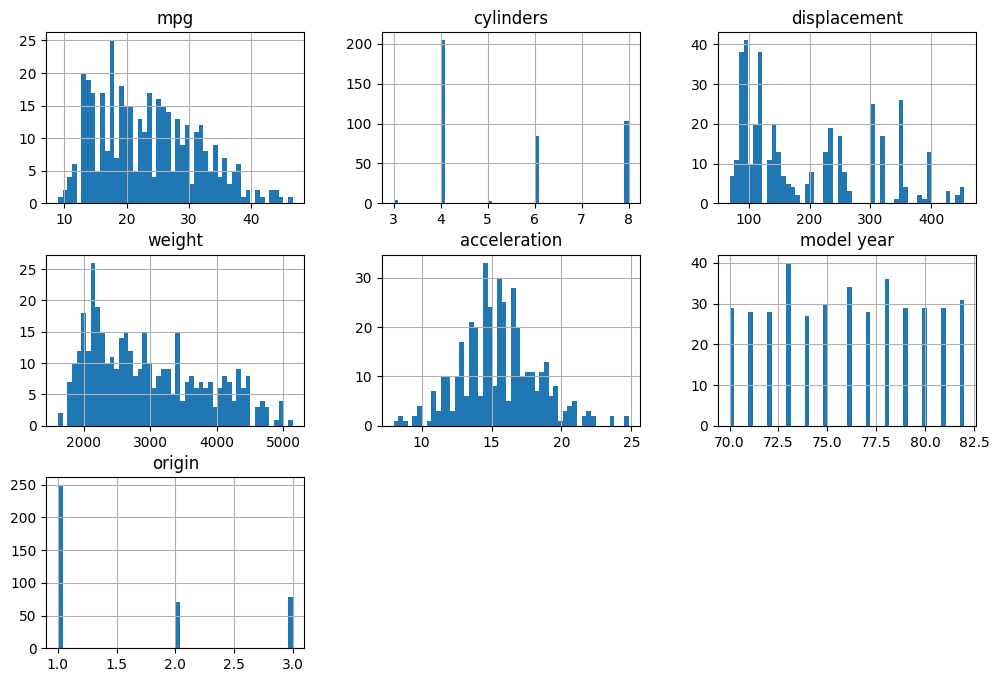

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Nul

C:\Users\frana\AppData\Local\Temp\ipykernel_3556\1764316167.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carsConsume["horsepower"].replace("?", np.nan, inplace=True)


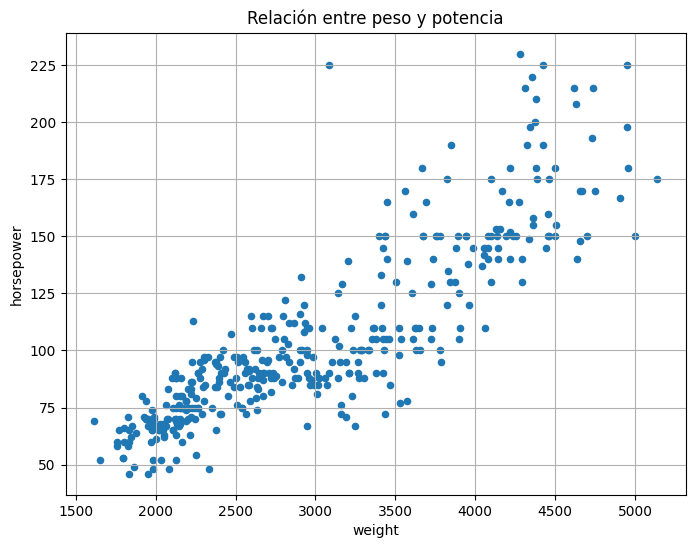

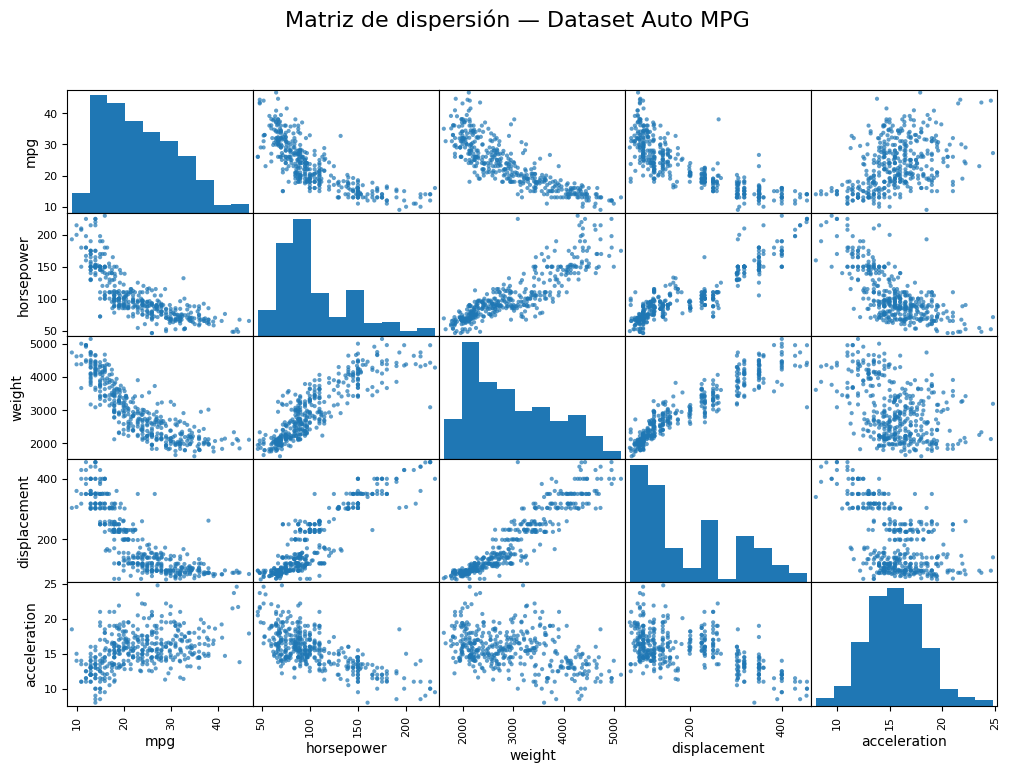

mpg                        1.000000
acceleration_per_hp        0.710556
model year                 0.579267
origin                     0.563450
acceleration               0.420289
power_weight_ratio        -0.269699
displacement_per_weight   -0.714536
cylinders                 -0.775396
horsepower                -0.778427
displacement              -0.804203
weight                    -0.831741
Name: mpg, dtype: float64
Shape del dataset procesado: (398, 9)
R²: 0.833
RMSE: 3.39
Primeras 5 predicciones: [19.8 21.3 34.  25.6 16.3]
Valores reales: [15.  18.  40.9 24.  17. ]
Linear Regression RMSE: 3.3934450645142156


C:\Users\frana\AppData\Local\Temp\ipykernel_3556\1764316167.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carsConsume["horsepower"].fillna(median_hp, inplace=True)


In [4]:
carsConsume = pd.read_csv(Path("Datasets/auto-mpg[1].csv"))
carsConsume.hist(bins=50, figsize=(12,8))
plt.show()
print(carsConsume.head())
print(carsConsume.columns)

# Reemplazar "?" por NaN y convertir horsepower a numérico
carsConsume["horsepower"].replace("?", np.nan, inplace=True)
carsConsume["horsepower"] = carsConsume["horsepower"].astype(float)

print(carsConsume.info())

y = carsConsume["mpg"]
X = carsConsume.drop(columns=["mpg", "car name"], errors='ignore')

train_carsConsume, test_carsConsume = train_test_split(carsConsume,test_size=0.2, stratify=carsConsume["cylinders"], random_state=42)

X_train = train_carsConsume.drop(columns=["mpg", "car name"], errors='ignore')
y_train = train_carsConsume["mpg"]

X_test = test_carsConsume.drop(columns=["mpg", "car name"], errors='ignore')
y_test = test_carsConsume["mpg"]

carsConsume.plot(kind="scatter", x="weight", y="horsepower", grid=True, figsize=(8, 6))
plt.title("Relación entre peso y potencia")
plt.show()

attributes = ["mpg", "horsepower", "weight", "displacement", "acceleration"]
scatter_matrix(carsConsume[attributes], figsize=(12, 8), alpha=0.7, diagonal='hist')
plt.suptitle("Matriz de dispersión — Dataset Auto MPG", fontsize=16)
plt.show()

# Relación potencia/peso — eficiencia del motor
carsConsume["power_weight_ratio"] = carsConsume["horsepower"] / carsConsume["weight"]

# Relación cilindrada/peso — mide "grandeza del motor relativo al tamaño del auto"
carsConsume["displacement_per_weight"] = carsConsume["displacement"] / carsConsume["weight"]

# Relación aceleración/potencia — qué tan rápido acelera por caballo de fuerza
carsConsume["acceleration_per_hp"] = carsConsume["acceleration"] / carsConsume["horsepower"]

corr_matrix = carsConsume.corr(numeric_only=True)

# Ordenar correlaciones con respecto a 'mpg'
print(corr_matrix["mpg"].sort_values(ascending=False))

median_hp = carsConsume["horsepower"].median()
carsConsume["horsepower"].fillna(median_hp, inplace=True)

num_attribs = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]
cat_attribs = ["origin"]

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", cat_pipeline, cat_attribs)])

set_config(display='diagram')  # Muestra el pipeline visualmente
carsConsume_prepared = preprocessing.fit_transform(carsConsume)

print("Shape del dataset procesado:", carsConsume_prepared.shape)

X_train_prepared = preprocessing.fit_transform(X_train)
X_test_prepared = preprocessing.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)
y_pred = lin_reg.predict(X_test_prepared)

print(f"R²: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

carsConsume_predictions = lin_reg.predict(X_test_prepared)
print("Primeras 5 predicciones:", carsConsume_predictions[:5].round(1))
print("Valores reales:", y_test.iloc[:5].values)

lin_mse = mean_squared_error(y_test, carsConsume_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE:", lin_rmse)

Imports Ej 7 práctica 4

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    ConfusionMatrixDisplay, f1_score, precision_score, recall_score
)
from sklearn.preprocessing import OneHotEncoder

Ej 7 Práctica 4

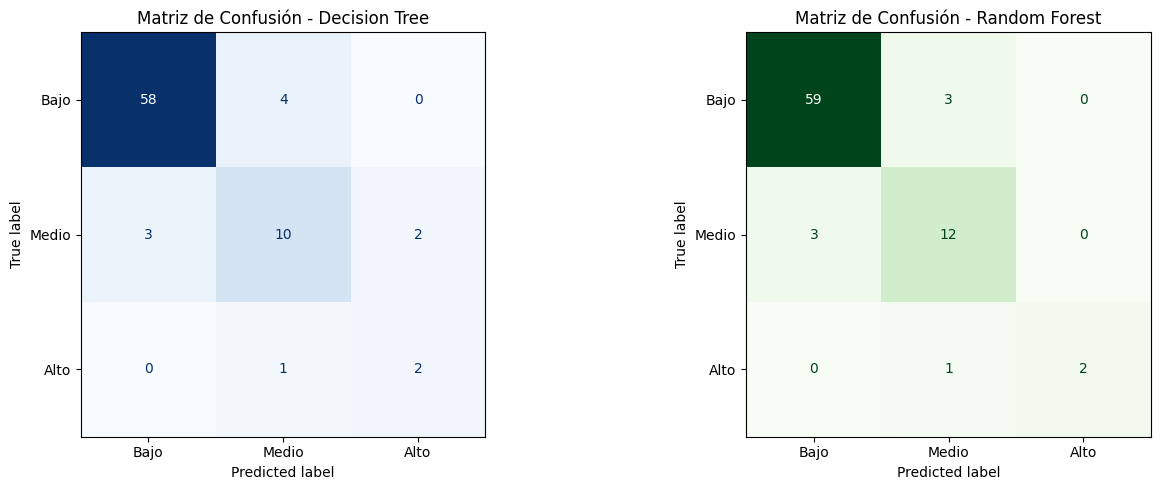

=== Métricas de Clasificación ===

Decision Tree:
  Accuracy: 0.8750
  F1-score: 0.8773
  Precision: 0.8806
  Recall: 0.8750

Random Forest:
  Accuracy: 0.9125
  F1-score: 0.9127
  Precision: 0.9156
  Recall: 0.9125


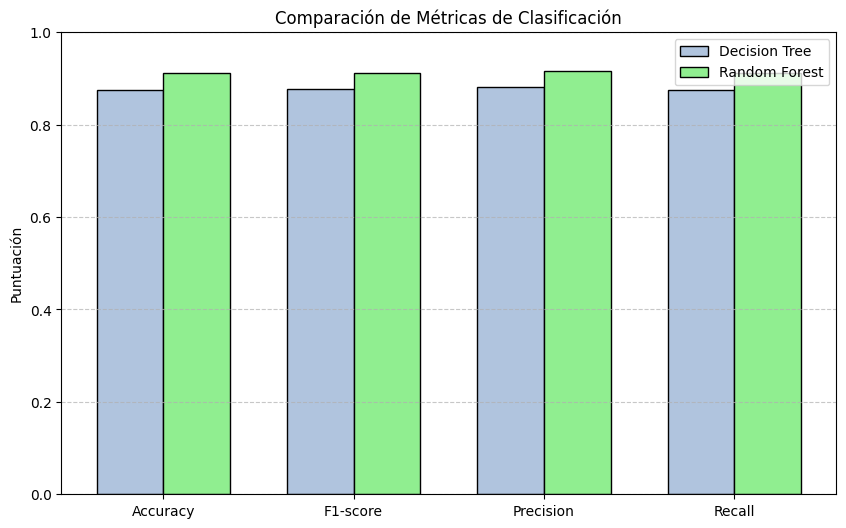

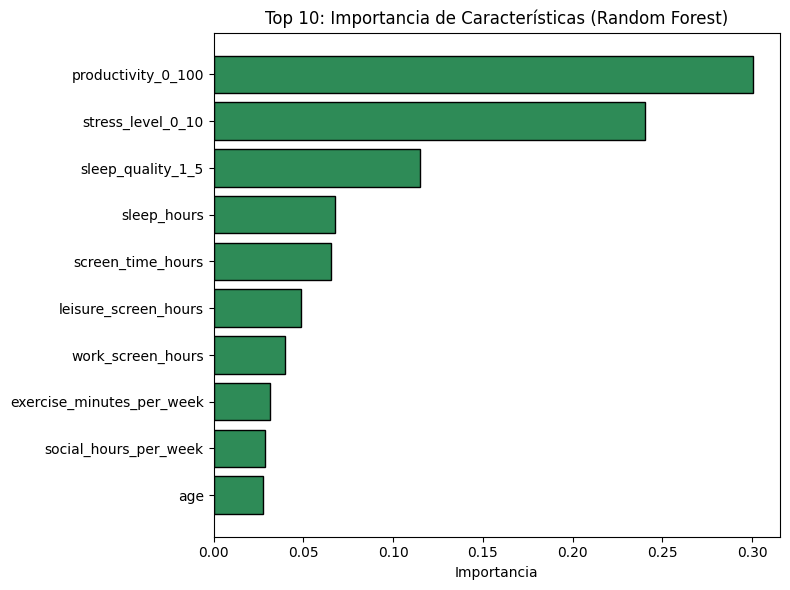

In [7]:
ST_vs_MW = pd.read_csv('Datasets/ScreenTime vs MentalWellness.csv')

def categorize_wellness(score):
    if score <= 33:
        return 'Bajo'
    elif score <= 66:
        return 'Medio'
    else:
        return 'Alto'

ST_vs_MW['wellness_class'] = ST_vs_MW['mental_wellness_index_0_100'].apply(categorize_wellness)

ST_vs_MW = ST_vs_MW.drop(columns=['user_id', 'mental_wellness_index_0_100'])

categorical_cols = ['gender', 'occupation', 'work_mode']
numerical_cols = [col for col in ST_vs_MW.columns if col not in categorical_cols + ['wellness_class']]

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(ST_vs_MW[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

X = pd.concat([ST_vs_MW[numerical_cols].reset_index(drop=True), encoded_df], axis=1)
y = ST_vs_MW['wellness_class'].astype(str).values  # Asegura tipo string

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Training
ST_vs_MW_DT = DecisionTreeClassifier(random_state=42, max_depth=10)
ST_vs_MW_DT.fit(X_train, y_train)

ST_vs_MW_RF = RandomForestClassifier(n_estimators=100, random_state=42)
ST_vs_MW_RF.fit(X_train, y_train)

# Predicts
y_pred_dt = ST_vs_MW_DT.predict(X_test)
y_pred_rf = ST_vs_MW_RF.predict(X_test)

# Matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=['Bajo', 'Medio', 'Alto'])
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Bajo', 'Medio', 'Alto'])
disp_dt.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Matriz de Confusión - Decision Tree')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['Bajo', 'Medio', 'Alto'])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Bajo', 'Medio', 'Alto'])
disp_rf.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title('Matriz de Confusión - Random Forest')

plt.tight_layout()
plt.show()

# Métricas numéricas
print("=== Métricas de Clasificación ===")
for name, y_pred in [("Decision Tree", y_pred_dt), ("Random Forest", y_pred_rf)]:
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    print(f"\n{name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall: {rec:.4f}")

# Comparación de métricas
metrics = ['Accuracy', 'F1-score', 'Precision', 'Recall']
dt_vals = [
    accuracy_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_dt, average='weighted'),
    precision_score(y_test, y_pred_dt, average='weighted'),
    recall_score(y_test, y_pred_dt, average='weighted')
]
rf_vals = [
    accuracy_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf, average='weighted'),
    precision_score(y_test, y_pred_rf, average='weighted'),
    recall_score(y_test, y_pred_rf, average='weighted')
]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, dt_vals, width, label='Decision Tree', color='lightsteelblue', edgecolor='black')
plt.bar(x + width/2, rf_vals, width, label='Random Forest', color='lightgreen', edgecolor='black')
plt.xticks(x, metrics)
plt.ylabel('Puntuación')
plt.title('Comparación de Métricas de Clasificación')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Importancia de características (solo Random Forest)
importances = ST_vs_MW_RF.feature_importances_
indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(8, 6))
plt.barh(range(10), importances[indices], color='seagreen', edgecolor='black')
plt.yticks(range(10), [X.columns[i] for i in indices])
plt.gca().invert_yaxis()
plt.title('Top 10: Importancia de Características (Random Forest)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()